In [1]:
import numpy as np
import matplotlib.pyplot as plt

metric_name = ['mAP', 'mAP@50', 'mAP@75', 'mAP@s', 'mAP@m', 'mAP@l', 
               'mAR@1', 'mAR@10', 'mAR@100', 'mAR@s', 'mAR@m', 'mAR@l']

def visualize_training_logs(log_file_path):
    # 로그 파일 읽기
    with open(log_file_path, "r") as file:
        lines = file.readlines()

    # 각 에폭 데이터를 저장할 딕셔너리 생성
    data = {}
    for line in lines:
        log_dict = eval(line.strip())  # 문자열 -> 딕셔너리 변환
        for key, value in log_dict.items():
            if key not in data:
                data[key] = []
            data[key].append(value)

    # 'epoch' 키가 있으면 분리 (x축으로 사용), 없으면 기본 인덱스 사용
    epochs = data.pop("epoch", range(len(lines)))

    # COCO 평가 데이터를 전치하여 각 항목을 행으로 정렬
    coco_eval = np.array(data['test_coco_eval_bbox']).T

    # 첫 번째 인덱스의 정보에서 가장 작은 값을 찾고 해당 위치를 확인
    first_index_values = coco_eval[0]
    min_value = max(first_index_values)
    min_index = np.argmax(first_index_values)

    # 해당 위치에서 모든 cocoeval 리스트의 값을 출력
    corresponding_values = coco_eval[:, min_index]
    print(f"Minimum value in the first index: {min_value} at position {min_index}")
    print("Values at this position for all metrics:")
    for met, value in zip(metric_name, corresponding_values):
        print(f"{met}: {value}")

    # 플롯 생성 (하나의 피규어에 모든 그래프 추가)
    num_plots = coco_eval.shape[0]
    fig, axes = plt.subplots(4, 3, figsize=(20, 15))  # 3행 4열로 그래프 배치
    axes = axes.flatten()  # 2D 배열을 1D로 평탄화

    for idx, (met, eval_bbox) in enumerate(zip(metric_name, coco_eval)):
        ax = axes[idx]
        ax.plot(epochs, eval_bbox, label=f"{met}", color='blue')
        ax.set_title(f"{met}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Value")
        ax.grid(True)
        ax.legend()

    # 남은 서브플롯 비우기
    for idx in range(num_plots, len(axes)):
        fig.delaxes(axes[idx])  # 사용되지 않는 서브플롯 제거

    plt.tight_layout()
    plt.show()

Minimum value in the first index: 0.11483201870246644 at position 395
Values at this position for all metrics:
mAP: 0.11483201870246644
mAP@50: 0.34941448822307414
mAP@75: 0.03748578362785894
mAP@s: 0.11712338481372807
mAP@m: 0.08226637332129313
mAP@l: 0.0
mAR@1: 0.014134376874927242
mAR@10: 0.0869330443893222
mAR@100: 0.23134818648828553
mAR@s: 0.23215678031793732
mAR@m: 0.1995238095238095
mAR@l: 0.0


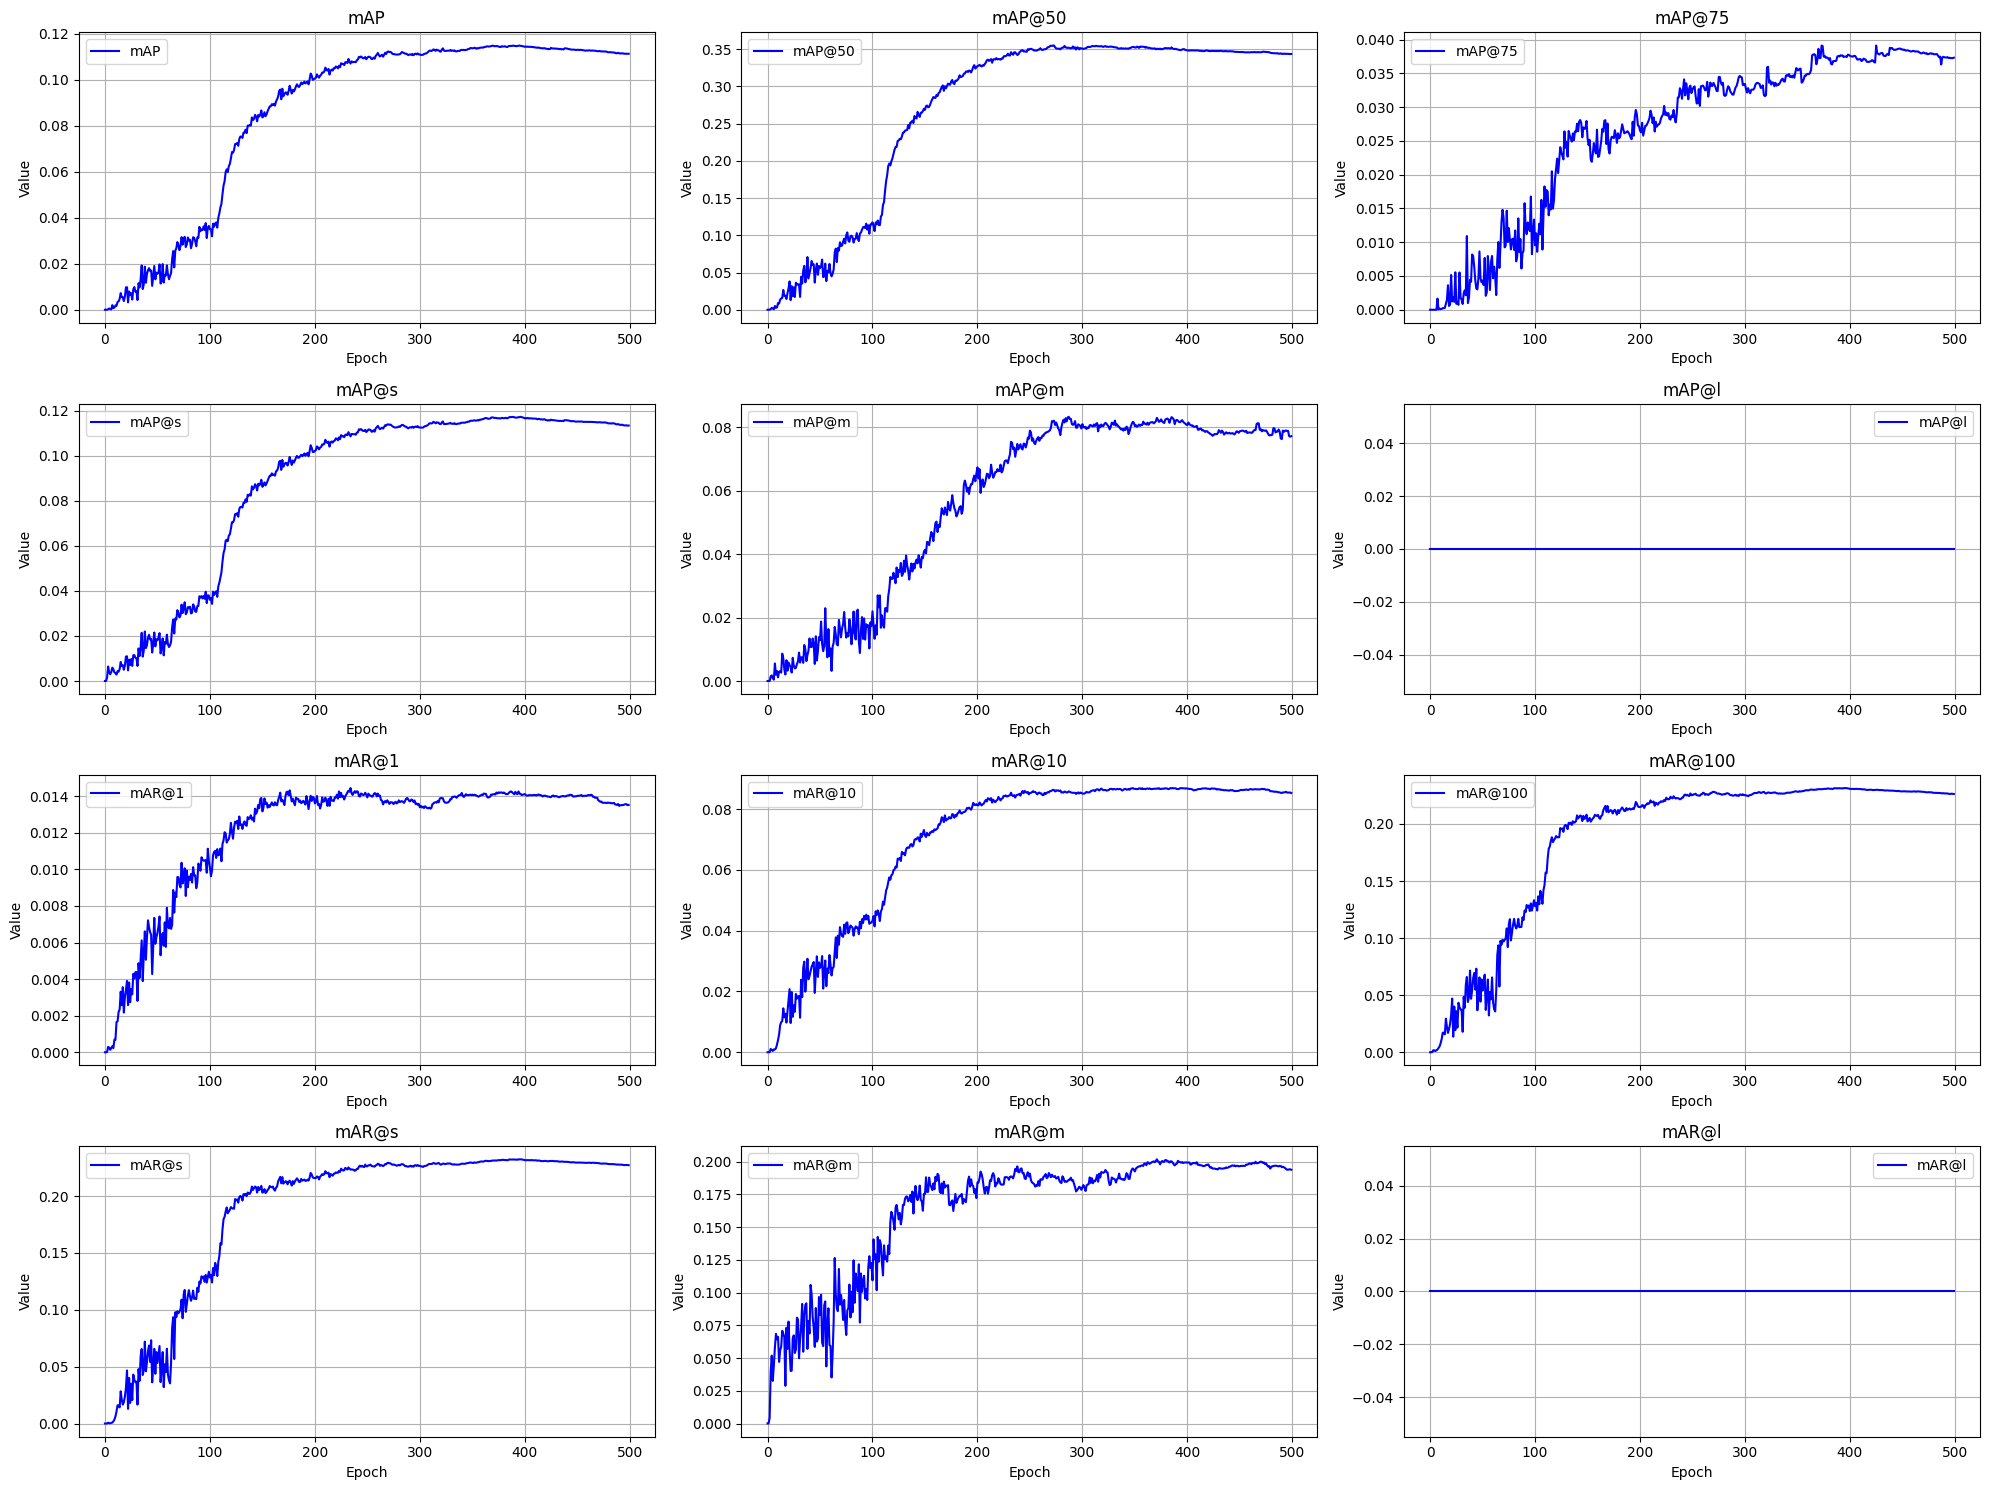

In [ ]:
visualize_training_logs('/workspace/chanyoung/code/MODU/output/lulu/kiosk/tiny_250411/log.txt')